# Лабораторная работа №4

Вариант 4

## Метрические методы классификации

### Цель работы
- Изучение принципов построения информационных систем с использованием метрических методов классификации.

### Задачи
- изучение инструментария Python для реализации алгоритмов метрической классификации;
- изучение методов оптимизации параметров метрической классификации;
- освоение модификаций kNN-метода.

In [2]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2960 sha256=a590727d0e03754f5ffb63c6ae3adfe684657c76f0c6254b7650ed4f7a17f465
  Stored in directory: c:\users\larchi\appdata\local\pip\cache\wheels\b1\70\bc\4f2b2698e552905b6ba586cbb9f210df0dd75813576741bf90
Successfully built sklearn


In [3]:
!pip install -U scikit-learn

     ---------------------------------------- 9.3/9.3 MB 6.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.1
    Uninstalling scikit-learn-1.3.1:
      Successfully uninstalled scikit-learn-1.3.1


In [93]:
data_source = "tarkov_ammo.csv"
data = pd.read_csv(data_source, 
                   delimiter=',', 
                   names=['name', 'flea', 'caliber', 'damage', 'penetration', 'armor_damage', 'accuracy', 'recoil',  'frag_chance', 'bleed_lt' ,'bleed_hvy', 'b_effectiveness_c1', 'b_effectiveness_c2', 'b_effectiveness_c3', 'b_effectiveness_c4', 'b_effectiveness_c5', 'b_effectiveness_c6'],
                   header=None)
data.head(20)

,name,flea,caliber,damage,penetration,armor_damage,accuracy,recoil,frag_chance,bleed_lt,bleed_hvy,b_effectiveness_c1,b_effectiveness_c2,b_effectiveness_c3,b_effectiveness_c4,b_effectiveness_c5,b_effectiveness_c6
0,name,flea,caliber,damage,penetration,armor_damage,accuracy,recoil,frag_chance,bleed_lt,bleed_hvy,b_effectiveness_c1,b_effectiveness_c2,b_effectiveness_c3,b_effectiveness_c4,b_effectiveness_c5,b_effectiveness_c6
1,12/70 5.25mm buckshot (8),yes,12x70mm,37,1,15,0,0,0,0,0,3,3,3,3,3,3
2,12/70 8.5mm Magnum buckshot (8),yes,12x70mm,50,2,26,-15,115,0,20,10,3,3,3,3,3,3
3,12/70 6.5mm Express buckshot (9),yes,12x70mm,35,3,26,15,0,0,0,0,3,3,3,3,3,3
4,12/70 7mm buckshot (8),yes,12x70mm,39,3,26,0,0,0,0,0,3,3,3,3,3,3
5,12/70 Piranha (10),yes,12x70mm,25,24,22,-5,0,0,15,15,6,6,5,4,4,4
6,12/70 flechette (8),yes,12x70mm,25,31,26,-10,0,0,25,25,6,6,6,5,5,5
7,12/70 RIP,yes,12x70mm,265,2,11,80,35,100,40,25,0,0,0,0,0,0
8,12/70 SuperFormance HP slug,no,12x70mm,220,5,12,170,-15,39,30,40,0,0,0,0,0,0
9,12/70 Grizzly 40 slug,yes,12x70mm,190,12,48,80,20,12,0,10,6,2,0,0,0,0


In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

data_source = "tarkov_ammo.csv"  # Поменяйте путь к файлу на ваш
data = pd.read_csv(data_source)

data_encoded = pd.get_dummies(data, columns=["name", "flea", "caliber", "damage", "penetration", "armor_damage", "accuracy", "frag_chance", "bleed_lt" ,"bleed_hvy", "b_effectiveness_c1", "b_effectiveness_c2", "b_effectiveness_c3", "b_effectiveness_c4", "b_effectiveness_c5", "b_effectiveness_c6"])

X = data_encoded.drop('recoil', axis=1)
y = data_encoded['recoil']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def build_knn_classifier(X_train, y_train, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

k_value = int(input("Введите количество ближайших соседей (K): "))

knn_classifier = build_knn_classifier(X_train, y_train, k_value)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

Введите количество ближайших соседей (K):  2


Точность модели: 0.42


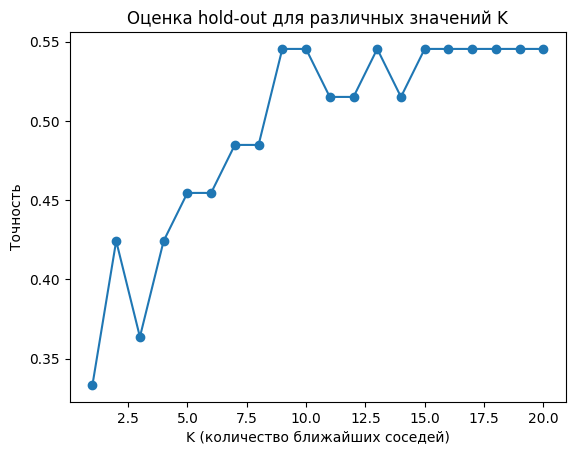

In [95]:
import matplotlib.pyplot as plt

def evaluate_holdout(X_train, y_train, X_test, y_test, k_values):
    accuracies = []

    for k in k_values:
        knn_classifier = build_knn_classifier(X_train, y_train, k)
        y_pred = knn_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    return accuracies

k_values = list(range(1, 21))

holdout_accuracies = evaluate_holdout(X_train, y_train, X_test, y_test, k_values)

plt.plot(k_values, holdout_accuracies, marker='o')
plt.title('Оценка hold-out для различных значений K')
plt.xlabel('K (количество ближайших соседей)')
plt.ylabel('Точность')
plt.show()

K = 1: Точность 0.33 При K = 1 модель использует только одного ближайшего соседа для классификации. Это означает, что она очень чувствительна к выбросам или шуму в данных. Вероятно, она слишком адаптирована к конкретным точкам, что может привести к переобучению.

K = 20: Точность 0.55 При K = 20 модель учитывает 20 ближайших соседей, что может сгладить воздействие выбросов и шума, но в то же время она может упускать локальные закономерности. Модель становится менее чувствительной к отдельным точкам, но при этом может терять важные детали.

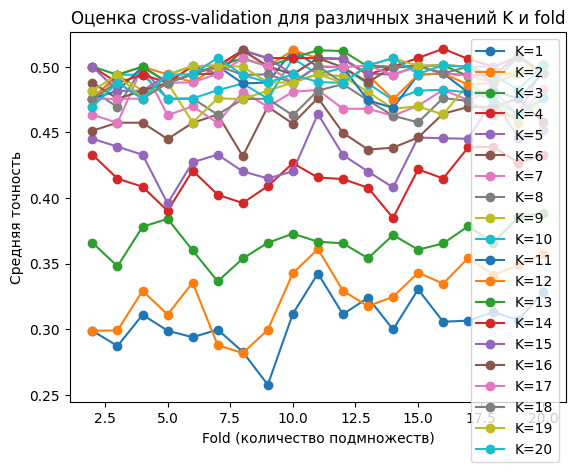

In [96]:
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

from sklearn.model_selection import cross_val_score

def evaluate_cross_validation(X, y, k_values, fold_values):
    results = {}

    for k in k_values:
        k_results = []
        for fold in fold_values:
            knn_classifier = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(knn_classifier, X, y, cv=fold)
            k_results.append(scores.mean())

        results[k] = k_results

    return results

fold_values = list(range(2, 21))

cross_validation_results = evaluate_cross_validation(X, y, k_values, fold_values)

for k, results in cross_validation_results.items():
    plt.plot(fold_values, results, label=f'K={k}', marker='o')

plt.title('Оценка cross-validation для различных значений K и fold')
plt.xlabel('Fold (количество подмножеств)')
plt.ylabel('Средняя точность')
plt.legend()
plt.show()

In [97]:
optimal_k_holdout = fold_values[holdout_accuracies.index(max(holdout_accuracies))]
print(f"\nОптимальное значение K на основе hold-out: {optimal_k_holdout}")

optimal_k_values = {}
for k, results in cross_validation_results.items():
    optimal_k_values[k] = fold_values[results.index(max(results))]

print("Оптимальные значения K на основе cross-validation:")
for k, optimal_k in optimal_k_values.items():
    print(f"Для K={k}, оптимальное значение fold: {optimal_k}")

best_k = max(optimal_k_values, key=lambda k: cross_validation_results[k][fold_values.index(optimal_k_values[k])])

print(f"\nНаилучшее значение K: {best_k}")

best_knn_classifier = build_knn_classifier(X_train, y_train, best_k)

y_pred_best_k = best_knn_classifier.predict(X_test)

accuracy_best_k = accuracy_score(y_test, y_pred_best_k)
print(f"\nТочность модели с использованием наилучшего значения K: {accuracy_best_k:.2f}")


Оптимальное значение K на основе hold-out: 10
Оптимальные значения K на основе cross-validation:
Для K=1, оптимальное значение fold: 11
Для K=2, оптимальное значение fold: 11
Для K=3, оптимальное значение fold: 20
Для K=4, оптимальное значение fold: 18
Для K=5, оптимальное значение fold: 18
Для K=6, оптимальное значение fold: 11
Для K=7, оптимальное значение fold: 4
Для K=8, оптимальное значение fold: 20
Для K=9, оптимальное значение fold: 11
Для K=10, оптимальное значение fold: 10
Для K=11, оптимальное значение fold: 10
Для K=12, оптимальное значение fold: 10
Для K=13, оптимальное значение fold: 11
Для K=14, оптимальное значение fold: 16
Для K=15, оптимальное значение fold: 8
Для K=16, оптимальное значение fold: 8
Для K=17, оптимальное значение fold: 19
Для K=18, оптимальное значение fold: 19
Для K=19, оптимальное значение fold: 14
Для K=20, оптимальное значение fold: 7

Наилучшее значение K: 14

Точность модели с использованием наилучшего значения K: 0.52


In [98]:
cv_results = evaluate_cross_validation(X_train, y_train, k_values, fold_values)

optimal_k_cv = max(cv_results, key=cv_results.get)
print(f"\nОптимальное значение K на основе cross-validation: {optimal_k_cv}")


Оптимальное значение K на основе cross-validation: 11


## Контрольные вопросы

### Особенности методов метрической классификации:
- Метод ближайшего соседа (1NN): Классификация объекта основывается на классе его ближайшего соседа.
- Метод k ближайших соседей (kNN): Классификация объекта определяется большинством классов k ближайших соседей.

### Принципы и этапы реализации метода kNN:
- Принцип: Определение класса объекта основывается на классе его соседей.
- Этапы:
    Задание количества соседей (K).
    Вычисление расстояний между объектом и всеми точками обучающей выборки.
    Выбор K ближайших соседей.
    Определение класса объекта на основе большинства классов среди соседей.
    
### Выбор количества соседей:
- Количество соседей выбирается эмпирическим путем или с использованием методов оценки качества, таких как hold-out или кросс-валидация.

### Метод парзеновского окна:
- Это обобщение метода kNN, где вес каждого соседа зависит от расстояния до объекта. Чем дальше сосед, тем меньше его вес.

### Параметры для оптимизации в методах kNN:
- k (количество соседей): Оптимизируется для достижения наилучшей производительности.
- Метрика расстояния: Выбор метрики (евклидово расстояние, манхэттенское расстояние и т.д.) может влиять на результаты.